In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
df=pd.read_csv(r"U:\Nandha projects\projects github\churn analysis\WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [2]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [3]:
print(df.describe)


<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [4]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

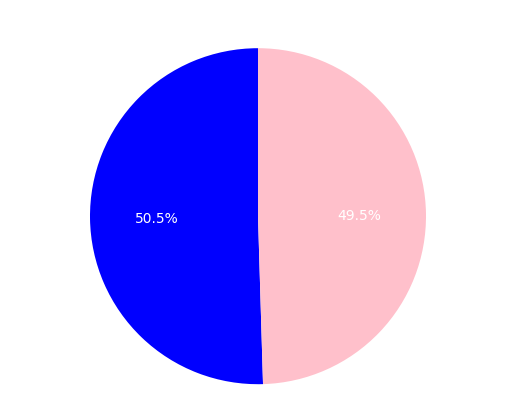

In [5]:
gender_count= df['gender'].value_counts()
labels=gender_count.index
values=gender_count.values
plt.figure(facecolor='none') 
plt.pie(values, labels=labels, startangle=90, colors=['blue', 'pink'], autopct='%1.1f%%', textprops={'color': 'white'})
plt.title('Comparison based on gender',color='white')
plt.axis('equal')
plt.show

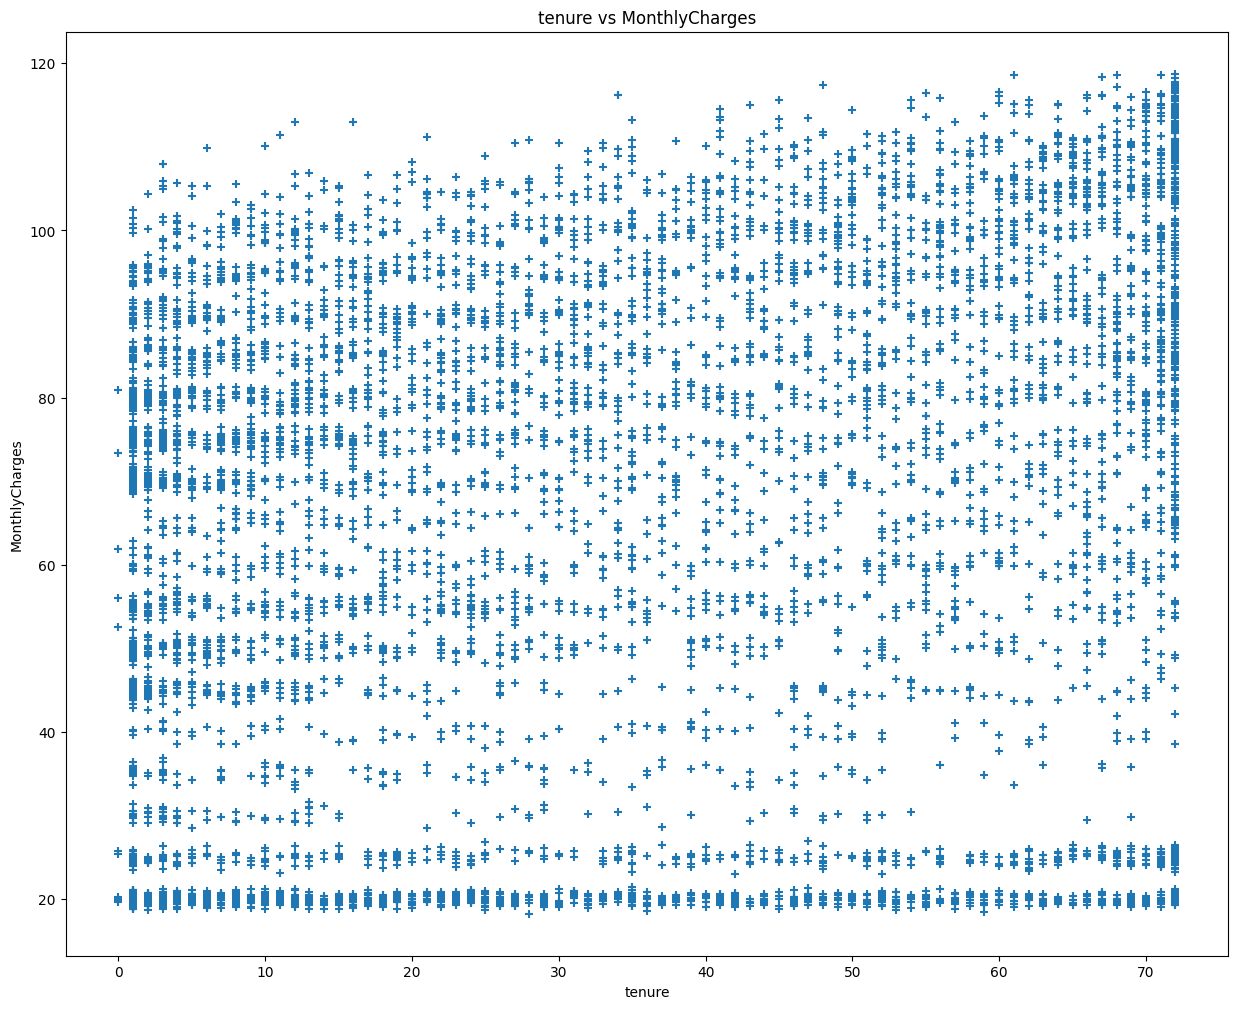

In [6]:
plt.figure(figsize=(15,12))
plt.scatter(df['tenure'],df['MonthlyCharges'],marker='+')
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.title('tenure vs MonthlyCharges')
plt.show()

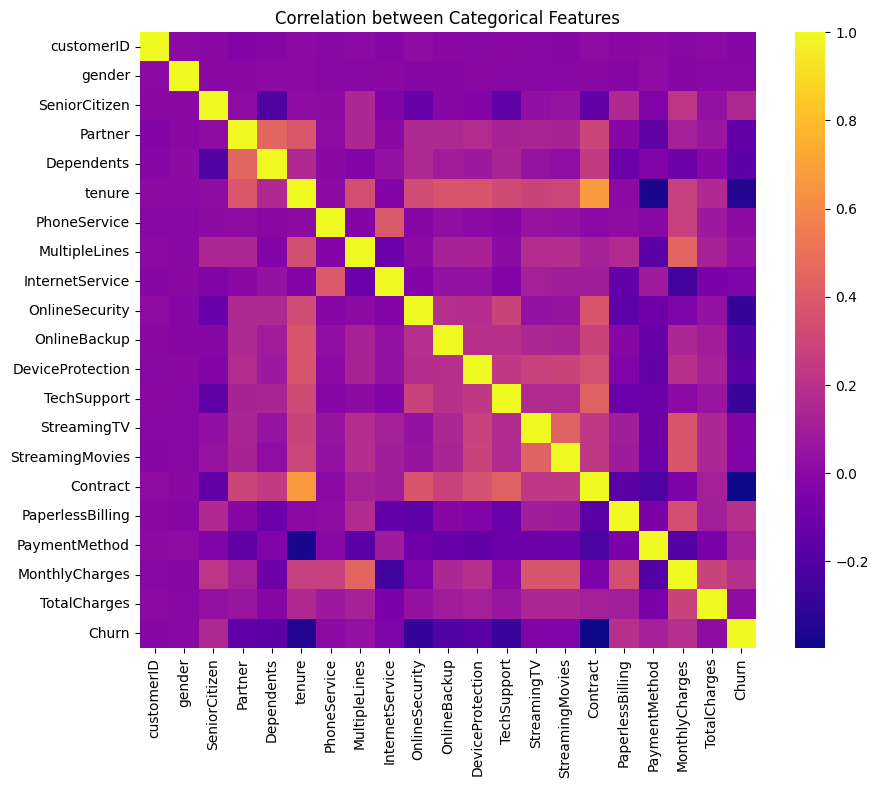

In [7]:
col_head=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
from sklearn.preprocessing import LabelEncoder
ln=LabelEncoder()
for gad in col_head:
    df[gad]=ln.fit_transform(df[gad])
plt.figure(figsize=(10,8))
sns.heatmap(df[col_head].corr(),annot=False, cmap='plasma', square=True)
plt.title('Correlation between Categorical Features')
plt.show()

In [8]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = df.drop('Churn', axis=1)
y = df['Churn']
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracy = []

for fold, (train_idx, test_idx) in enumerate(kfold.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracy.append(accuracy)
    print(f"Fold {fold+1} Accuracy: {accuracy:.3f}")
average_accuracy = sum(fold_accuracy) / len(fold_accuracy)
print(f"Average Accuracy Across {kfold.n_splits} Folds: {average_accuracy:.3f}")

Fold 1 Accuracy: 0.800
Fold 2 Accuracy: 0.801
Fold 3 Accuracy: 0.792
Fold 4 Accuracy: 0.790
Fold 5 Accuracy: 0.793
Average Accuracy Across 5 Folds: 0.795


[0.12956728 0.02329366 0.01810212 0.0194406  0.01643708 0.15157364
 0.00543151 0.02047604 0.02293653 0.06102334 0.02530883 0.02063669
 0.03878332 0.01572297 0.01470801 0.07576109 0.02249605 0.04586171
 0.14141419 0.13102535]


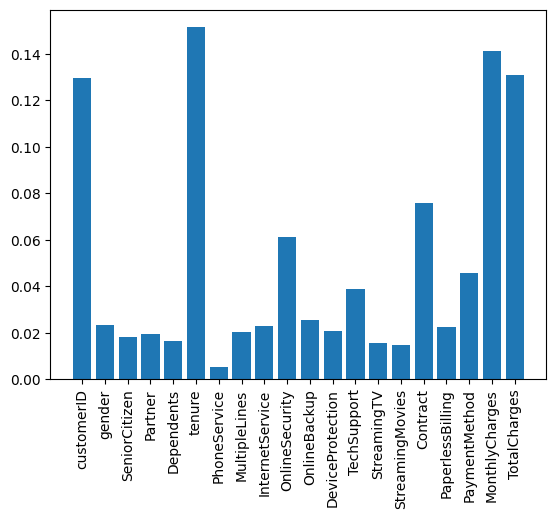

In [9]:
importances= model.feature_importances_
print(importances)
plt.bar(X.columns,importances)
plt.xlabel='VARIABLE'
plt.ylabel='Importance'
plt.xticks(rotation=90)
plt.title='feature Importance'
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = {
    'logistic regression': LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC' : SVC(),
    'Neural network': MLPClassifier(),
    'gradient boosting':GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy =accuracy_score(y_test,y_pred)
    print(f"{name}:{accuracy:.3f}") 

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic regression:0.809
RandomForestClassifier:0.795
SVC:0.747
Neural network:0.697
gradient boosting:0.803
Decision Tree:0.738
